## Combining Topic Modelling and Sentiment Analysis

Here, we will combine the results of topic modelling and sentiment analysis. We 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os, datetime
import matplotlib.pyplot as plt

In [2]:
# Optional libraries for plotting
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# Define our topic mapping
topic_dict = {0: "Society", 1: "Military and defense", 2: "Economics and business", 3: "Domestic affairs", 4: "Breaking News", 5: "Foreign affairs and diplomacy"}

In [4]:
# Custom Tracker to Help with Gathering Results
class SentiTracker:
    def __init__(self):
        self.track_dict = {}
        self.count_dict = {}
        self.global_sum = 0
        self.global_ctr = 0
    def add(self, topic, year, sentiment):
        # For each year and topic, we will add the sentiment to the sum
        key = "{}-{}".format(int(year), int(topic))
        # We record the portaion of negative sentiment
        # 0 if positive, 1 if negative
        if sentiment >= 0:
            sentiment = 1
        else:
            sentiment = -1
        # If the key exists, we add the sentiment to the sum
        # If not, we create a new entry
        if key in self.track_dict.keys():
            self.track_dict[key] += sentiment
            self.count_dict[key] += 1
        else:
            self.track_dict[key] = sentiment
            self.count_dict[key] = 1
        self.global_sum += sentiment
        self.global_ctr += 1
        return
    def get(self, topic, year):
        # We return the portion of negative sentiment tweets for a given topic and year
        key = "{}-{}".format(int(year), int(topic))
        if not key in self.track_dict.keys():
            return None
        return (self.track_dict[key] / self.count_dict[key])


class PolarityTracker:
    def __init__(self):
        self.track_dict = {}
        self.count_dict = {}
        self.global_sum = 0
        self.global_ctr = 0
    def add(self, topic, year, sentiment):
        # For each year and topic, we will add the sentiment to the sum
        key = "{}-{}".format(int(year), int(topic))
        # We record the portaion of polarized sentiment
        if abs(sentiment) > 0.5:
            sentiment = 1
        else:
            sentiment = 0
        # If the key exists, we add the sentiment to the sum
        # If not, we create a new entry
        if key in self.track_dict.keys():
            self.track_dict[key] += sentiment
            self.count_dict[key] += 1
        else:
            self.track_dict[key] = sentiment
            self.count_dict[key] = 1
        self.global_sum += sentiment
        self.global_ctr += 1
        return
    def get(self, topic, year):
        # We return the portion of negative sentiment tweets for a given topic and year
        key = "{}-{}".format(int(year), int(topic))
        if not key in self.track_dict.keys():
            return None
        return (self.track_dict[key] / self.count_dict[key])

In [5]:
# Helper function to get the year from a string date
def get_year(string_date):
    date = datetime.datetime.strptime(string_date, "%Y-%m-%d")
    return date.year

In [6]:
# Read in our data
topic_df = pd.read_csv("../data/tweets_PDChina_All_with_topic.csv")
sentiment_df = pd.read_csv("../data/tweets_PDChina_All_with_sentiment_v2.csv")

In [7]:
# Getting the topic and sentiment assignments
topics_assignment = topic_df['topic'].to_list()
sentiment_assignment = sentiment_df['sentiment'].to_list()
year_lst = [get_year(_) for _ in sentiment_df['Date'].tolist()]

In [8]:
# Create our tracker
senti_tracker = SentiTracker()
polarity_tracker = PolarityTracker()
for topic, year, sentiment in zip(topics_assignment, year_lst, sentiment_assignment):
    senti_tracker.add(topic, year, sentiment)
    polarity_tracker.add(topic, year, sentiment)

In [9]:
# Save the results into a dataframe (Optional)
sentiment_df.insert(1, "topic", topics_assignment, True)
sentiment_df.insert(0, "year", year_lst, True)
sentiment_df.to_csv("../data/tweets_PDChina_All_with_sentiment_and_topic_v2.csv", index=False)

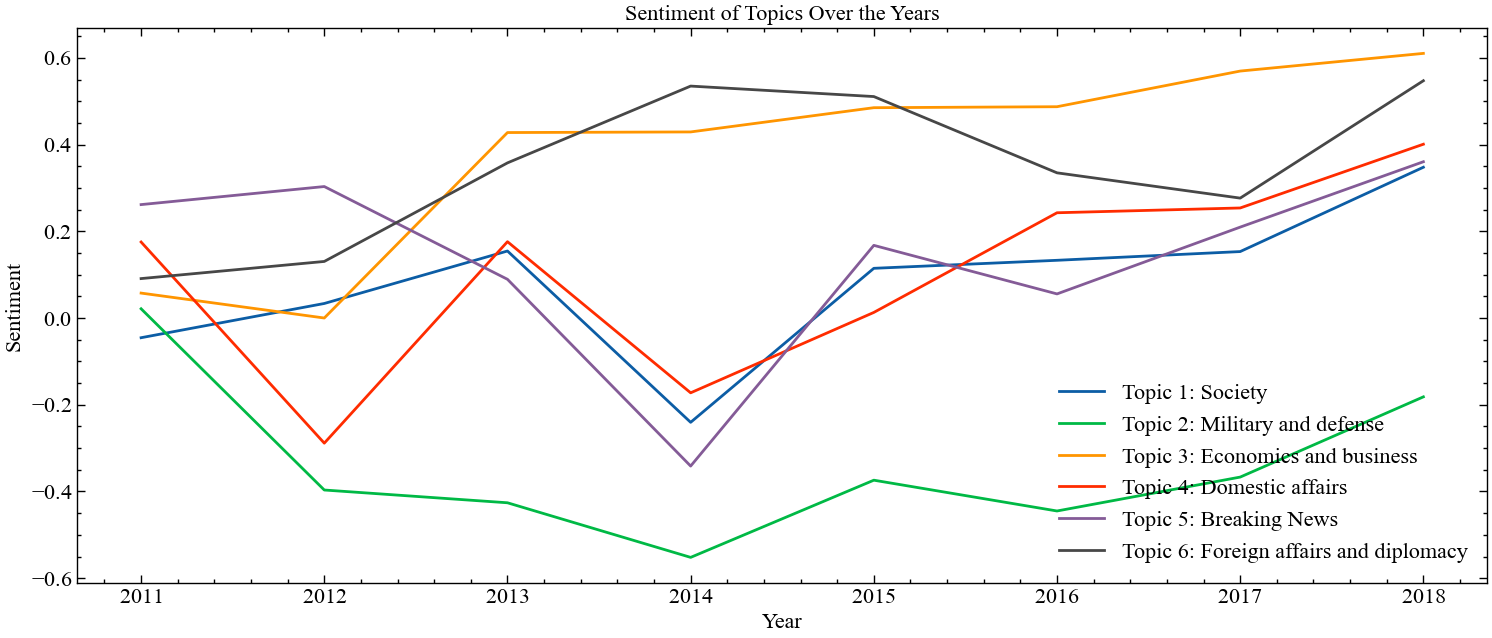

In [10]:
# Plot the results in the same graph
fig = plt.figure(figsize=(18.2, 7.2))

plot_year_lst = sorted(list(set(year_lst)))

for topic in range(len(set(topics_assignment))):
    plot_sentiment_lst = [senti_tracker.get(topic=topic, year=year) for year in plot_year_lst]
    plt.plot(plot_year_lst, plot_sentiment_lst, label=f'Topic {topic+1}: {topic_dict[topic]}')

plt.title('Sentiment of Topics Over the Years')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.legend()

Here, we will combine the results of topic modeling and sentiment analysis. We observe the sentiment trajectories of six different topics over the years 2011 to 2018. The sentiment score ranges from -0.5 to +0.6, indicating the overall negative or positive sentiment associated with each topic per year.

Topic 1, labeled 'Society', shows a fluctuating sentiment over the years, peaking positively around 2017. Topic 2, 'Military and defense', has the most consistent upward trend, starting from a negative sentiment in 2011 and reaching its highest positive sentiment by 2018. Topic 3, 'Economies and business', experiences a sharp decline in sentiment between 2011 and 2012, followed by a volatile but generally positive trend thereafter. Topic 4, 'Domestic affairs', while initially starting off on a positive note, dips into the negative sentiment around 2014 before recovering to a positive sentiment towards the end of the period.

Topic 5, 'Breaking News', has a relatively stable sentiment throughout the years with minor fluctuations. Lastly, Topic 6, 'Foreign affairs and diplomacy', shows an interesting pattern with a sharp negative dip in 2014, a recovery in the subsequent years, and surpassing other topics in positive sentiment by 2018.

Overall, this visualization enables us to understand the public sentiment trends in various domains over time, providing insights into the collective psyche and its response to global events.

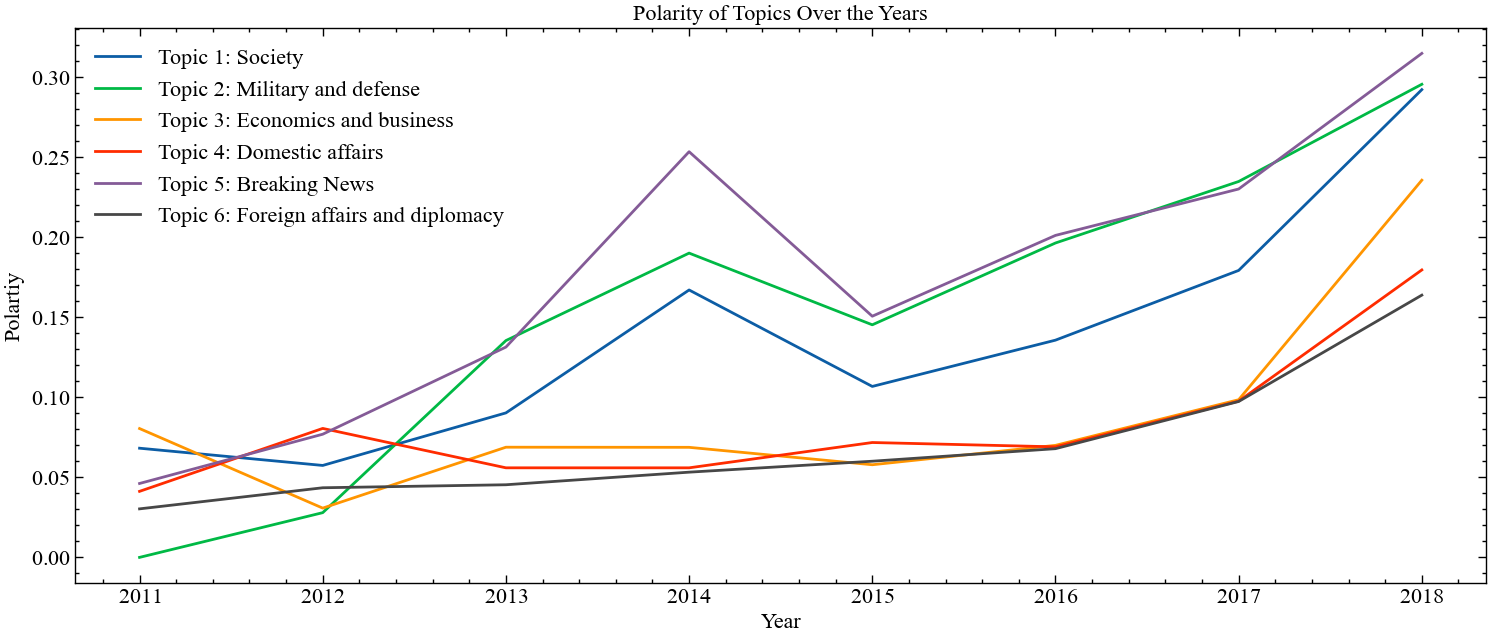

In [11]:
# Plot the results in the same graph
fig = plt.figure(figsize=(18.2, 7.2))

plot_year_lst = sorted(list(set(year_lst)))

for topic in range(len(set(topics_assignment))):
    plot_sentiment_lst = [polarity_tracker.get(topic=topic, year=year) for year in plot_year_lst]
    plt.plot(plot_year_lst, plot_sentiment_lst, label=f'Topic {topic+1}: {topic_dict[topic]}')

plt.title('Polarity of Topics Over the Years')
plt.xlabel('Year')
plt.ylabel('Polartiy')
plt.legend()

This graph presents the polarity of sentiments associated with six different topics from 2011 to 2018, where polarity is a measure of the strength of sentiment in absolute value, greater than 0.5, indicating strong sentiments. Unlike sentiment which can be negative or positive, polarity here refers to the intensity of the sentiment regardless of its direction.

Topic 1, 'Society', exhibits moderate polarity throughout the years with a slight increase over time, suggesting a strengthening of opinions or feelings towards societal issues. Topic 2, 'Military and defense', shows a gradual increase in polarity, reflecting a growing intensity in sentiments about military matters.

Topic 3, 'Economics and business', demonstrates significant variation in polarity, with a peak around 2014, possibly indicative of strong reactions to economic events or business developments during that year. Topic 4, 'Domestic affairs', also shows variability, with a notable peak in 2015, suggesting a year of particularly strong sentiments regarding domestic issues.

Topic 5, 'Breaking News', has an interesting profile with a sharp peak in 2015, indicating a period of intense public reaction to breaking news events, followed by a steady increase in polarity, implying a rise in the strength of sentiments associated with such news.

Lastly, Topic 6, 'Foreign affairs and diplomacy', starts with lower levels of polarity but shows a consistent and sharp increase over the years, suggesting that sentiments on international matters have become increasingly intense as we approach 2018.

Overall, the graph indicates that the strength of public sentiment or the intensity of opinions on these topics has generally increased over the observed period, with certain topics experiencing more pronounced fluctuations, potentially correlating with specific events or changes in the global or national context.